## Dane

In [1]:
import pandas as pd
train = pd.read_excel("./data/time_series_375_prerpocess_en.xlsx").fillna(method='ffill')
test = pd.read_excel("./data/time_series_test_110_preprocess_en.xlsx").fillna(method='ffill')

## Model i kod
dostępny na https://github.com/HAIRLAB/Pre_Surv_COVID_19

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, recall_score

import utils
import warnings

import pandas as pd
import numpy as np

from utils_features_selection import *

from xgboost import plot_tree

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

warnings.filterwarnings("ignore")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Top 10 features:
                                    col       xgb
1                                 Type2  0.070058
22                        (%)lymphocyte  0.033307
43                    Corrected calcium  0.028130
46                 Prothrombin activity  0.021943
42  High sensitivity C-reactive protein  0.021865
25                              albumin  0.021806
17                                HCO3-  0.021082
10                                 Urea  0.021008
24                       eosinophils(%)  0.020959
48            RBC distribution width SD  0.020282


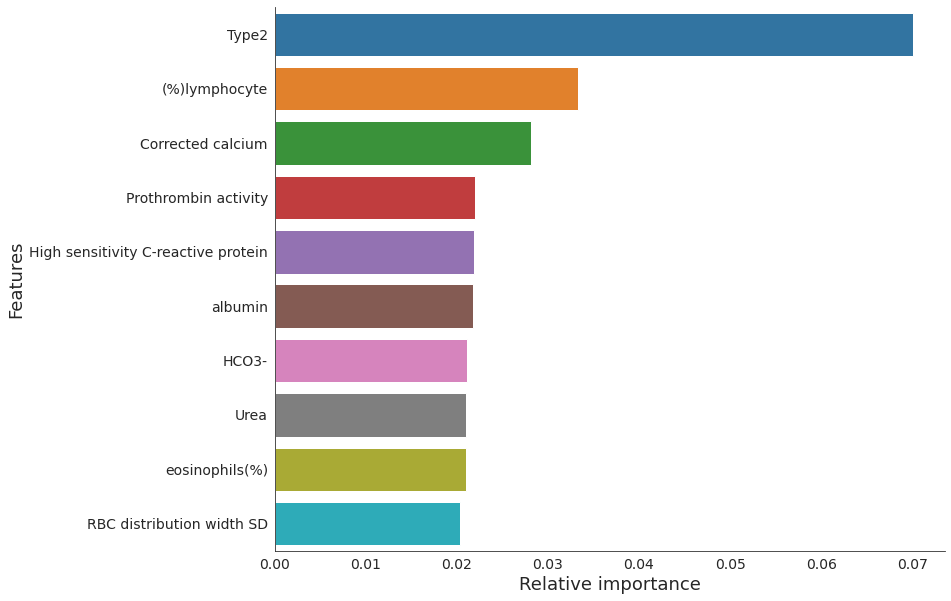

['Type2']
5-Fold CV:


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [5]:
X_data_all_features,Y_data,x_col = data_read_and_split()
name_dict = {'乳酸脱氢酶':'Lactate dehydrogenase (LDH)','淋巴细胞(%)':'Lymphocytes(%)','超敏C反应蛋白':'High-sensitivity C-reactive protein (hs-CRP)',
              '钠':'Sodium','氯':'Chlorine','国际标准化比值':'International Normalized Ratio (INR)','嗜酸细胞(#)':'Eosinophils(#)',
              '嗜酸细胞(%)':'Eosinophils(%)','单核细胞(%)':'Monocytes(%)','白蛋白':'Albumin'}
import_feature = pd.DataFrame()
import_feature['col'] = x_col
import_feature['xgb'] = 0
import_feature.head()
for i in range(100): # 50,150
    x_train, x_test, y_train, y_test = train_test_split(X_data_all_features, Y_data, test_size=0.3, random_state=i)

    model = xgb.XGBClassifier(
            max_depth=4
            ,learning_rate=0.2
            ,reg_lambda=1
            ,n_estimators=150
            ,subsample = 0.9
            ,colsample_bytree = 0.9,
    verbosity = 0)
    model.fit(x_train, y_train)
    import_feature['xgb'] = import_feature['xgb']+model.feature_importances_/100
import_feature = import_feature.sort_values(axis=0, ascending=False, by='xgb')
print('Top 10 features:')
print(import_feature.head(10))
# Sort feature importances from GBC model trained earlier
indices = np.argsort(import_feature['xgb'].values)[::-1]
Num_f = 10
indices = indices[:Num_f]
    
# Visualise these with a barplot
# plt.subplots(dpi=400,figsize=(12, 10))
plt.subplots(figsize=(12, 10))
# g = sns.barplot(y=list(name_dict.values())[:Num_f], x = import_feature.iloc[:Num_f]['xgb'].values[indices], orient='h') #import_feature.iloc[:Num_f]['col'].values[indices]
g = sns.barplot(y=import_feature.iloc[:Num_f]['col'].values[indices], x = import_feature.iloc[:Num_f]['xgb'].values[indices], orient='h') #import_feature.iloc[:Num_f]['col'].values[indices]
g.set_xlabel("Relative importance",fontsize=18)
g.set_ylabel("Features",fontsize=18)
g.tick_params(labelsize=14)
sns.despine() 
# plt.savefig('feature_importances_v3.png')
plt.show()
# g.set_title("The mean feature importance of XGB models");
import_feature_cols= import_feature['col'].values[:10]

num_i = 1
val_score_old = 0
val_score_new = 0
while val_score_new >= val_score_old:
    val_score_old = val_score_new
    x_col = import_feature_cols[:num_i]
    print(x_col)
    X_data = X_data_all_features[x_col]#.values
    print('5-Fold CV:')
    acc_train, acc_val, acc_train_std, acc_val_std = StratifiedKFold_func_with_features_sel(X_data.values,Y_data.values)
    print("Train AUC-score is %.4f ; Validation AUC-score is %.4f" % (acc_train,acc_val))
    print("Train AUC-score-std is %.4f ; Validation AUC-score-std is %.4f" % (acc_train_std,acc_val_std))
    val_score_new = acc_val
    num_i += 1
        
print('Selected features:',x_col[:-1])

In [6]:
StratifiedKFold_func_with_features_sel(X_data.values,Y_data.values)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [7]:
Y_data.values

array([ 9.000e-02,  9.000e-02,  6.000e-02,  3.800e-01,  2.000e-02,
        5.000e-02,  4.000e-02,  2.000e-02,  2.000e-02,  1.100e-01,
        4.000e-02,  4.000e-02,  4.000e-02,  5.000e-02,  4.000e-02,
        3.000e-02,  2.000e-02,  5.000e-02,  6.000e-02,  3.000e-02,
        3.000e-02,  4.000e-02,  8.000e-02,  2.000e-02,  2.000e-02,
        4.000e-02,  3.000e-02,  5.000e-02,  1.200e-01,  8.000e-02,
        3.000e-02,  2.000e-02,  5.000e-02, -1.000e+00,  6.000e-02,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,  6.000e-02,
       -1.000e+00, -1.000e+00,  6.000e-02,  5.000e-02, -1.000e+00,
       -1.000e+00,  6.000e-02, -1.000e+00,  7.000e-02,  4.000e-02,
       -1.000e+00,  6.000e-02, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,  7.000e-02,
        4.000e-02,  2.000e-02,  6.000e-02,  1.800e-01,  2.000e-02,
        4.000e-02,  3.000e-02,  1.700e-01,  2.000e-02,  2.200e-01,
        5.000e-02,  4.000e-02,  2.000e-02, -1.000e+00,  3.000e

In [3]:
def features_selection():
    X_data_all_features,Y_data,x_col = data_read_and_split()
    name_dict = {'乳酸脱氢酶':'Lactate dehydrogenase (LDH)','淋巴细胞(%)':'Lymphocytes(%)','超敏C反应蛋白':'High-sensitivity C-reactive protein (hs-CRP)',
              '钠':'Sodium','氯':'Chlorine','国际标准化比值':'International Normalized Ratio (INR)','嗜酸细胞(#)':'Eosinophils(#)',
              '嗜酸细胞(%)':'Eosinophils(%)','单核细胞(%)':'Monocytes(%)','白蛋白':'Albumin'}
    import_feature = pd.DataFrame()
    import_feature['col'] = x_col
    import_feature['xgb'] = 0
    import_feature.head()
    for i in range(100): # 50,150
        x_train, x_test, y_train, y_test = train_test_split(X_data_all_features, Y_data, test_size=0.3, random_state=i)

        model = xgb.XGBClassifier(
                max_depth=4
                ,learning_rate=0.2
                ,reg_lambda=1
                ,n_estimators=150
                ,subsample = 0.9
                ,colsample_bytree = 0.9,
        verbosity = 0)
        model.fit(x_train, y_train)
        import_feature['xgb'] = import_feature['xgb']+model.feature_importances_/100
    import_feature = import_feature.sort_values(axis=0, ascending=False, by='xgb')
    print('Top 10 features:')
    print(import_feature.head(10))
    # Sort feature importances from GBC model trained earlier
    indices = np.argsort(import_feature['xgb'].values)[::-1]
    Num_f = 10
    indices = indices[:Num_f]
    
    # Visualise these with a barplot
    # plt.subplots(dpi=400,figsize=(12, 10))
    plt.subplots(figsize=(12, 10))
    # g = sns.barplot(y=list(name_dict.values())[:Num_f], x = import_feature.iloc[:Num_f]['xgb'].values[indices], orient='h') #import_feature.iloc[:Num_f]['col'].values[indices]
    g = sns.barplot(y=import_feature.iloc[:Num_f]['col'].values[indices], x = import_feature.iloc[:Num_f]['xgb'].values[indices], orient='h') #import_feature.iloc[:Num_f]['col'].values[indices]
    g.set_xlabel("Relative importance",fontsize=18)
    g.set_ylabel("Features",fontsize=18)
    g.tick_params(labelsize=14)
    sns.despine() 
    # plt.savefig('feature_importances_v3.png')
    plt.show()
    # g.set_title("The mean feature importance of XGB models");
    import_feature_cols= import_feature['col'].values[:10]

    num_i = 1
    val_score_old = 0
    val_score_new = 0
    while val_score_new >= val_score_old:
        val_score_old = val_score_new
        x_col = import_feature_cols[:num_i]
        print(x_col)
        X_data = X_data_all_features[x_col]#.values
        print('5-Fold CV:')
        acc_train, acc_val, acc_train_std, acc_val_std = StratifiedKFold_func_with_features_sel(X_data.values,Y_data.values)
        print("Train AUC-score is %.4f ; Validation AUC-score is %.4f" % (acc_train,acc_val))
        print("Train AUC-score-std is %.4f ; Validation AUC-score-std is %.4f" % (acc_train_std,acc_val_std))
        val_score_new = acc_val
        num_i += 1
        
    print('Selected features:',x_col[:-1])
    
    return list(x_col[:-1])

def single_tree(cols=['乳酸脱氢酶','淋巴细胞(%)','超敏C反应蛋白']):
    print('single_tree:\n')
    #获取375病人（data_df_unna） 和110病人（data_pre_df）数据
    data_df_unna,data_pre_df = data_preprocess()
    #去掉全空行，此时375总数目变成351
    data_df_unna = data_df_unna.dropna(subset=cols,how='any')

    cols.append('Type2')
    #获取病人的结局标签
    Tets_Y = data_pre_df.reset_index()[['PATIENT_ID','出院方式']].copy()
    #修改dataframe的名字
    Tets_Y = Tets_Y.rename(columns={'PATIENT_ID': 'ID', '出院方式': 'Y'})
    # 获取110病人的标签数据
    y_true = Tets_Y['Y'].values

    x_col = cols[:-1]
    y_col = cols[-1]
    # 获取351病人的三特征数据
    x_np = data_df_unna[x_col].values
    # 获取351病人的标签数据
    y_np = data_df_unna[y_col].values
    # 获取110病人的三特征数据
    x_test = data_pre_df[x_col].values
    # 在351病人上划分训练集和验证集，此时110视为测试集
    X_train, X_val, y_train, y_val = train_test_split(x_np, y_np, test_size=0.3, random_state=6)
    #限定单树xgb模型
    model = xgb.XGBClassifier(
        max_depth=3,
        n_estimators=1,
        verbosity = 0
    )
    model.fit(X_train,y_train)

    #训练集混淆矩阵
    pred_train = model.predict(X_train)
    show_confusion_matrix(y_train, pred_train)
    print(classification_report(y_train, pred_train))

    #验证集混淆矩阵
    pred_val = model.predict(X_val)
    show_confusion_matrix(y_val, pred_val)
    print(classification_report(y_val, pred_val))
    #测试集混淆矩阵
    
    pred_test = model.predict(x_test)
    print('True test label:',y_true)
    print('Predict test label:',pred_test.astype('int32'))
    show_confusion_matrix(y_true, pred_test)
    print(classification_report(y_true, pred_test))
    
    plt.figure(dpi=300,figsize=(8,6))
    plot_tree(model)
    plt.show()
    
    graph = xgb.to_graphviz(model)
    graph.render(filename='single-tree.dot')
    #单树可视化
    #ceate_feature_map(cols[:-1])
    #graph = xgb.to_graphviz(model, fmap='xgb.fmap', num_trees=0, **{'size': str(10)})
    #graph.render(filename='single-tree.dot')

def Compare_with_other_method(sub_cols=['乳酸脱氢酶','淋巴细胞(%)','超敏C反应蛋白']):
    x_np,y_np,x_col = data_read_and_split(is_dropna=True,sub_cols=sub_cols)

    X_train, X_val, y_train, y_val = train_test_split(x_np, y_np, test_size=0.3, random_state=6)

    xgb_n_clf = xgb.XGBClassifier(
        max_depth=4
        ,learning_rate=0.2
        ,reg_lambda=1
        ,n_estimators=150
        ,subsample = 0.9
        ,colsample_bytree = 0.9
        ,random_state=0,
    verbosity = 0)
    
    tree_clf = tree.DecisionTreeClassifier(random_state=0,max_depth=4) #random_state=0,之前没加
    RF_clf1 = RandomForestClassifier(random_state=0,n_estimators=150,max_depth=4,)
    LR_clf = linear_model.LogisticRegression(random_state=0,C=1,solver='lbfgs')
    LR_reg_clf = linear_model.LogisticRegression(random_state=0,C=0.1, solver='lbfgs')
    
    fig = plt.figure(dpi=400,figsize=(16, 8))

    Num_iter = 100
    
    i = 0
    labels_names = []
    Moodel_name = ['Multi-tree XGBoost with all features',
                   'Decision tree with all features',
                   'Random Forest with all features',
                   'Logistic regression with all features with regularization parameter = 1 (by default)',
                   'Logistic regression with all features with regularization parameter = 10',]
    for model in [xgb_n_clf,tree_clf,RF_clf1,LR_clf,LR_reg_clf]:
        print('Model:'+Moodel_name[i])
        acc_train, acc_val, acc_train_std, acc_val_std = StratifiedKFold_func(x_np.values, y_np.values,Num_iter,model, score_type ='f1')
        #print('F1-score of Train:%.6f with std:%.4f \nF1-score of Validation:%.4f with std:%.6f '%(acc_train,acc_train_std,acc_val,acc_val_std))
        acc_train, acc_val, acc_train_std, acc_val_std = StratifiedKFold_func(x_np.values, y_np.values,Num_iter,model, score_type ='auc')
        print('AUC of Train:%.6f with std:%.4f \nAUC of Validation:%.6f with std:%.4f '%(acc_train,acc_train_std,acc_val,acc_val_std))

        model.fit(X_train,y_train)
        pred_train_probe = model.predict_proba(X_train)[:,1]
        pred_val_probe = model.predict_proba(X_val)[:,1]
        #plot_roc(y_val, pred_val_probe,Moodel_name[i],fig,labels_names,i)
        plot_roc(y_train, pred_train_probe,Moodel_name[i],fig,labels_names,i)
        print('AUC socre:',roc_auc_score(y_val, pred_val_probe))
        
        i = i+1

    x_np_sel = x_np[sub_cols]
    X_train, X_val, y_train, y_val = train_test_split(x_np_sel, y_np, test_size=0.3, random_state=6) 

    xgb_clf = xgb.XGBClassifier(
        max_depth=3,
        n_estimators=1,
        random_state=0,
    )
    
    tree_clf = tree.DecisionTreeClassifier(random_state=0,max_depth=3)
    RF_clf2 = RandomForestClassifier(random_state=0,n_estimators=1,max_depth=3,)

    #i = 0
    Moodel_name = ['Single-tree XGBoost with three features',
                   'Decision tree with three features',
                   'Random Forest with a single tree constraint with three features',]
    for model in [xgb_clf,tree_clf,RF_clf2]:
        print('Model'+Moodel_name[i-5])
        #f1
        acc_train, acc_val, acc_train_std, acc_val_std = StratifiedKFold_func(x_np_sel.values, y_np.values,Num_iter,model, score_type ='f1')
        #print('F1-score of Train:%.6f with std:%.4f \nF1-score of Validation:%.4f with std:%.6f '%(acc_train,acc_train_std,acc_val,acc_val_std))
        #auc
        acc_train, acc_val, acc_train_std, acc_val_std = StratifiedKFold_func(x_np_sel.values, y_np.values,Num_iter,model, score_type ='auc')
        print('AUC of Train:%.6f with std:%.4f \nAUC of Validation:%.6f with std:%.4f '%(acc_train,acc_train_std,acc_val,acc_val_std))
        
        model.fit(X_train,y_train)
        pred_train_probe = model.predict_proba(X_train)[:,1] 
        pred_val_probe = model.predict_proba(X_val)[:,1]   
        #plot_roc(y_val, pred_val_probe,Moodel_name[i-5],fig,labels_names,i) 
        plot_roc(y_train, pred_train_probe,Moodel_name[i-5],fig,labels_names,i)
        print('AUC socre:',roc_auc_score(y_val, pred_val_probe))
        
        i = i+1
    
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='SouthEastOutside', fontsize=14)
    plt.savefig('AUC_train.png')
    plt.show()

if __name__ == '__main__':
    selected_cols = features_selection()
    single_tree()
    ## Compare Method
    print('Compare with other methods')    
    Compare_with_other_method(selected_cols)

KeyboardInterrupt: 